In [7]:
import pandas as pd
df=pd.read_csv('Time Series Dataset.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df.drop('datetime', axis=1, inplace=True)

In [9]:
X = df.drop('count', axis=1)
y = df['count']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [11]:
from keras.layers import LSTM, Dense, Bidirectional, Dropout
from keras import regularizers
from keras.models import Sequential
# Define the model
model = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.01)), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.5),
    Bidirectional(LSTM(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))),
    Dense(32, activation='relu'),
    Dense(1)
])


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=128, validation_data=(X_test_reshaped, y_test), verbose=1)


Epoch 1/100
69/69 [==============================] - 9s 29ms/step - loss: 62201.7383 - val_loss: 27269.1523
Epoch 2/100
69/69 [==============================] - 1s 18ms/step - loss: 22345.1270 - val_loss: 16666.0957
Epoch 3/100
69/69 [==============================] - 1s 18ms/step - loss: 12083.7949 - val_loss: 6369.7852
Epoch 4/100
69/69 [==============================] - 1s 18ms/step - loss: 6227.0518 - val_loss: 3240.0344
Epoch 5/100
69/69 [==============================] - 1s 20ms/step - loss: 3736.9177 - val_loss: 1665.7509
Epoch 6/100
69/69 [==============================] - 2s 33ms/step - loss: 2255.3804 - val_loss: 918.8655
Epoch 7/100
69/69 [==============================] - 1s 18ms/step - loss: 1604.2590 - val_loss: 566.4924
Epoch 8/100
69/69 [==============================] - 1s 18ms/step - loss: 1181.9041 - val_loss: 452.3359
Epoch 9/100
69/69 [==============================] - 1s 19ms/step - loss: 984.3203 - val_loss: 291.8846
Epoch 10/100
69/69 [==========================

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model on the test set
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

69/69 [==============================] - 1s 4ms/step


In [15]:
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

MSE: 12.4483
MAE: 2.8262
R2: 0.9996


In [17]:
import numpy as np

# Define a new data point for prediction
new_data_point = np.array([[4,0,0,2,10.66,12.880,60,12.9980,2,7,2011,12,17,5]])  # Assuming year=2024, month=4, day=15, hour=10

# Scale the new data using the same MinMaxScaler object used for training
scaled_new_data_point = scaler.transform(new_data_point)

# Reshape the data to match the input shape of the LSTM model
reshaped_new_data_point = scaled_new_data_point.reshape((scaled_new_data_point.shape[0], 1, scaled_new_data_point.shape[1]))

# Perform the prediction
predicted_count = model.predict(reshaped_new_data_point)[0][0]

# Print the predicted count
print(f'Predicted Count for the new data point: {predicted_count}')


1/1 [==============================] - 0s 24ms/step
Predicted Count for the new data point: 10.918502807617188


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
# Define a new data point for prediction
new_data_point = np.array([[3,1,0,2,31.16,36.365,66,16.9979,209,357,2012,9,3,13]])  # Assuming year=2024, month=4, day=15, hour=10

# Scale the new data using the same MinMaxScaler object used for training
scaled_new_data_point = scaler.transform(new_data_point)

# Reshape the data to match the input shape of the LSTM model
reshaped_new_data_point = scaled_new_data_point.reshape((scaled_new_data_point.shape[0], 1, scaled_new_data_point.shape[1]))

# Perform the prediction
predicted_count = model.predict(reshaped_new_data_point)[0][0]

# Print the predicted count
print(f'Predicted Count for the new data point: {predicted_count}')


1/1 [==============================] - 0s 41ms/step
Predicted Count for the new data point: 565.4171142578125


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


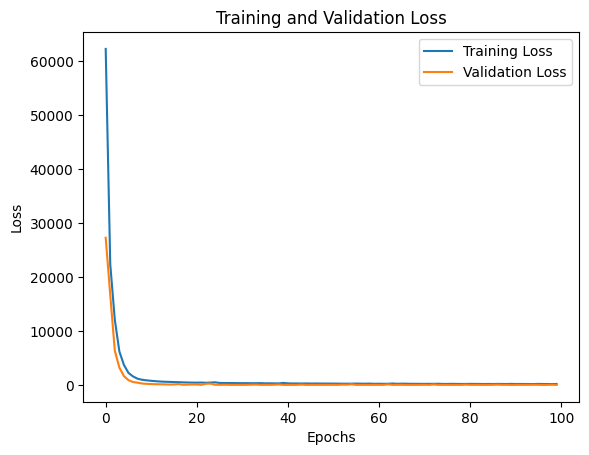

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()